<a href="https://colab.research.google.com/github/Gayathri2006-bit/Gayathri/blob/main/True_and_fake_news_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as nd
import pandas as pd

In [ ]:
from google.colab  import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Test=pd.read_csv('/content/drive/MyDrive/True and Fake News Prediction/test.csv')

In [ ]:
Train=pd.read_csv('/content/drive/MyDrive/True and Fake News Prediction/train.csv')

Data structure and content

In [ ]:
Train.shape

(20800, 5)

In [ ]:
Test.shape

(5200, 4)

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
Train.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
Train.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
Train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [ ]:
Test.isnull().sum()

,0
id,0
title,122
author,503
text,7


In [ ]:
Test.describe()

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [ ]:
Test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


Data preprocessing

1.Removing the null values

In [ ]:
Train=Train.fillna(' ')

In [ ]:
Train.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


Data preprocessing

In [ ]:
Train=Train.fillna(' ')

In [ ]:
Train.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [ ]:
Train.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
Train['subject']=Train['author'] + ''

In [ ]:
Train.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,Daniel J. Flynn
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy


In [ ]:
Test=Test.fillna(' ')

In [ ]:
Test.isnull().sum()

,0
id,0
title,0
author,0
text,0


In [ ]:
Test.describe()

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [ ]:
Test['subject']=Test['author'] + ''

In [ ]:
Test.head()

,id,title,author,text,subject
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David Streitfeld
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel Victor
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast Network


2.Tokenization

In [ ]:
import nltk
nltk. download ('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
Train['tokens']=Train['subject'].apply(word_tokenize)

In [ ]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus,"[Darrell, Lucus]"
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,Daniel J. Flynn,"[Daniel, J., Flynn]"
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com,[Consortiumnews.com]
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss,"[Jessica, Purkiss]"
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy,"[Howard, Portnoy]"


In [ ]:
from nltk.tokenize import word_tokenize
Test['tokens']=Test['subject'].apply(word_tokenize)

In [ ]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David Streitfeld,"[David, Streitfeld]"
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,,[]
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams,"[Common, Dreams]"
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel Victor,"[Daniel, Victor]"
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast Network,"[Truth, Broadcast, Network]"


3.Lower casting test

In [ ]:
Train['subject']= Train['subject'].str.lower()

In [ ]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucus,"[Darrell, Lucus]"
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j. flynn,"[Daniel, J., Flynn]"
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.com,[Consortiumnews.com]
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss,"[Jessica, Purkiss]"
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy,"[Howard, Portnoy]"


In [ ]:
Test['subject']= Test['subject'].str.lower()

In [ ]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",david streitfeld,"[David, Streitfeld]"
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,,[]
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams,"[Common, Dreams]"
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victor,"[Daniel, Victor]"
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast network,"[Truth, Broadcast, Network]"


4.Removal of punctuation

In [ ]:
Train['subject']=Train['subject'].str.replace('[^\w\s]','')

In [ ]:
Test['subject']=Test['subject'].str.replace('[^\w\s]','')

Removal of stop words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sw=set(nltk.corpus.stopwords.words('english'))
print(sw)

{'no', 'ourselves', 'am', 'he', 'them', 'nor', 'she', 'd', 'which', 'theirs', 'themselves', 'having', 'not', 're', "she's", 't', 'ma', 'at', 'that', 'very', "couldn't", 'mightn', 'y', 'with', 'couldn', 'didn', "you're", 'you', 'whom', 'ain', 'there', 'hasn', 'are', 'our', 'why', 'yours', 'before', 'i', 'a', 'yourselves', 'such', 'will', 'yourself', 'they', 'be', "needn't", 'most', "wouldn't", 'as', 'haven', 'had', 'o', 'aren', 'can', 'during', 'after', 'who', 'being', 'up', 'below', 'what', 'once', 'does', 'so', "you've", 'doing', 'was', 'if', 'out', 'too', 'myself', 'here', 'where', 'of', 'all', "mightn't", "shouldn't", 'won', "should've", 'against', 'mustn', 'her', 'itself', 'then', 'me', 'between', 'only', 'its', 'weren', 'were', 'wasn', 'have', 'for', 'now', 'under', 'about', "wasn't", 'hadn', 'because', 'doesn', 'further', 'has', 'more', 'did', 'how', 'while', 'wouldn', "weren't", 'until', "hasn't", 'the', "that'll", "won't", 'on', "aren't", 'than', "you'll", 'both', 'your', 'agai

In [ ]:
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
# Here we try to remove the stopwords by adding only the words which are not in the SW stopword set.

In [ ]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucus,"[Darrell, Lucus]"
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j. flynn,"[Daniel, J., Flynn]"
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.com,[Consortiumnews.com]
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss,"[Jessica, Purkiss]"
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy,"[Howard, Portnoy]"


In [ ]:
Test['subject'] = Test['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
# Here we try to remove the stopwords by adding only the words which are not in the SW stopword set.

In [ ]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",david streitfeld,"[David, Streitfeld]"
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,,[]
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams,"[Common, Dreams]"
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victor,"[Daniel, Victor]"
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast network,"[Truth, Broadcast, Network]"


6. Vectoritation

In [ ]:
X=Train['subject']
Y=Train['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Vt=TfidfVectorizer()
Vt.fit(X)

TfidfVectorizer()

In [ ]:
X.head()

,subject
0,darrell lucus
1,daniel j. flynn
2,consortiumnews.com
3,jessica purkiss
4,howard portnoy


In [ ]:
X=Vt.transform(X)

In [ ]:
print(X)

  (0, 2379)	0.7071067811865475
  (0, 953)	0.7071067811865475
  (1, 1346)	0.833190949022925
  (1, 936)	0.5529853908253612
  (2, 844)	0.8208192105782462
  (2, 824)	0.571188080710465
  (3, 3140)	0.7459535660715113
  (3, 1952)	0.6659979559016646
  (4, 3081)	0.7113383829885128
  (4, 1762)	0.7028497029147042
  (5, 2856)	0.7564257934989979
  (5, 936)	0.6540795203409229
  (7, 3367)	0.6994632176078436
  (7, 163)	0.7146685995716354
  (9, 3982)	0.5490843889502862
  (9, 3550)	0.4963289841343124
  (9, 3494)	0.40920434736500183
  (9, 2577)	0.533587551782156
  (10, 2152)	0.7238616446147673
  (10, 71)	0.6899451568462557
  (11, 3927)	0.7445571572287767
  (11, 749)	0.667558716233563
  (12, 1334)	0.7071067811865475
  (12, 186)	0.7071067811865475
  (13, 1913)	0.6663894561641477
  :	:
  (20789, 1789)	0.5778565997937832
  (20790, 3559)	0.7848608077090216
  (20790, 91)	0.6196721008100514
  (20791, 1561)	0.7977923554536009
  (20791, 936)	0.6029322993336775
  (20792, 1985)	0.6364225567199054
  (20792, 1666)	0.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [243]:
XTrain,XTest,YTrain,YTest=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [ ]:
Modal=LogisticRegression()

In [ ]:
Modal.fit(XTrain,YTrain)

LogisticRegression()

In [ ]:
ytrpredict=Modal.predict(XTrain)

In [245]:
accuracy =accuracy_score(YTrain,ytrpredict)
precision = precision_score(YTrain, ytrpredict)
recall = recall_score(YTrain, ytrpredict)
f1 = f1_score(YTrain, ytrpredict)

print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:', f1)





 Training Accuracy: 0.9703125
 Training Precision: 0.9595355383532723
 Training Recall: 0.9821128451380552
Training F1 Score: 0.9706929283341245


In [247]:
Yttpredict=Modal.predict(XTest)

In [250]:
accuracy  =accuracy_score(YTest,Yttpredict)
precision = precision_score(YTest, Yttpredict)
recall = recall_score(YTest, Yttpredict)
f1 = f1_score(YTest, Yttpredict)

print(' Testing Accuracy:', accuracy)
print(' Testing Precision:', precision)
print(' Testing Recall:', recall)
print('Testing F1 Score:', f1)

 Testing Accuracy: 0.9557692307692308
 Testing Precision: 0.9410125406409661
 Testing Recall: 0.9726356216994719
Testing F1 Score: 0.9565627950897073


In [252]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Generate the confusion matrix

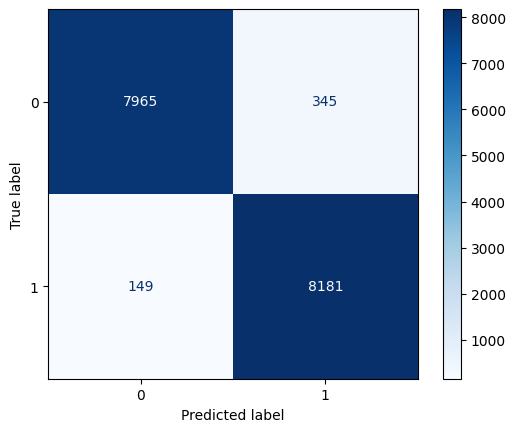

In [253]:
cm = confusion_matrix(YTrain,ytrpredict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Display the confusion matrix

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm) disp.plot(cmap=plt.cm.Blues)
plt.show()

SyntaxError: invalid syntax (<ipython-input-238-ebb0cd72b6ab>, line 1)

Generate the confusion matrix

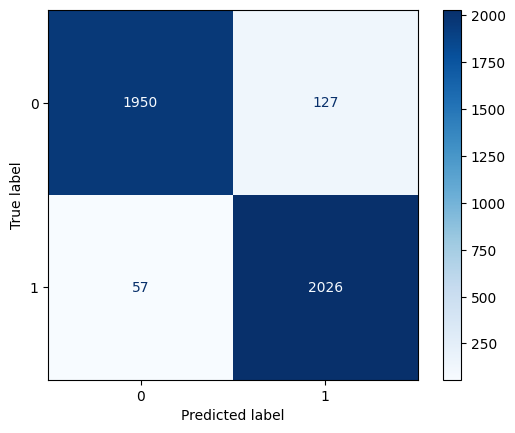

In [254]:
cm = confusion_matrix(YTest,Yttpredict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Display the confusion matrix

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm) disp.plot(cmap=plt.cm.Blues)
plt.show()

SyntaxError: invalid syntax (<ipython-input-240-ebb0cd72b6ab>, line 1)

In [255]:
import pickle

#SUMMARY

Project Summary: True and Fake News Prediction Using NLP

This project focuses on predicting the reliability of news articles by analyzing text features such as word patterns and sentiment using Natural Language Processing (NLP). The program’s data structure efficiently organizes news articles, storing features like text, labels (true/fake), and vectorized content, enabling precise content analysis.

Data preprocessing is a critical phase in this project, involving several steps to prepare the raw data for machine learning. These steps include:

1. Removing Null Values: Discarding incomplete or missing data to ensure dataset quality.
2. Tokenization: Splitting text into words or phrases for detailed analysis.
3. Lower Casing Text: Standardizing text by converting all characters to lowercase.
4. Removal of Punctuation: Simplifying text by stripping unnecessary punctuation.
5. Removal of Stop Words: Eliminating common, non-informative words.
6. Stemming or Lemmatization: Reducing words to their root forms for consistency.
7. Vectorization: Converting text into numerical data for model input.

These preprocessing steps enhance data quality, enabling accurate true and fake news classification.